In [2]:
# In this line , We have imported all the packages that will be required further.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import os
import cv2
from scipy import ndimage, misc
from sklearn.datasets import fetch_mldata
from PIL import Image

In [3]:
# This is about getting the current directory path. 
# So, we are not required to chnage the path for dataset. It will automatically take the path for dataset.
path = os.getcwd() + "\\dataset_USF_Random_With_Noise"

In [4]:
# In this line of code, It will read the Images file from dataset and will resize each image file.
# For resizing the image file, we are considering converting to 784 pixels each file, so that we can reduce the computation time.

images = []
for root, dirnames, filenames in os.walk(path):
    for filename in filenames:
        filepath = os.path.join(root, filename)
        image = ndimage.imread(filepath, mode="1")
        image_resized = misc.imresize(image, (28,28))
        image_resized = np.reshape(image_resized, (np.product(image_resized.shape)))
        images.append(image_resized) 

C:\Users\asus\Anaconda3\Lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
C:\Users\asus\Anaconda3\Lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


In [5]:
# To check the image size
images[1].shape

(784,)

In [464]:
# For counting total number of Images in Folder
count = 0
for i in images:
    count+=1

In [465]:
count

300

In [466]:
# TO storing the images pixels in a list and then converting the list into array.
Xlist=[]
for i in range(count):
    Xlist.append(list(np.asarray(images[i])))

In [467]:
X = np.asarray(Xlist)

In [468]:
#some_digit = X[17]
#some_digit_image = some_digit.reshape(28,28)
#plt.imshow(some_digit_image)
#plt.show()

In [469]:
#X[0].shape

In [470]:
# It will automatically read the path of CSV file.
csv_path = os.getcwd() + "\\dataset_USF_Random_With_Noise.csv"
csv = pd.read_csv(csv_path)

In [471]:
# It will take each image file's label(USF / Non USF) and store into a List.
y = []
for i in range(count):
    x =csv['Label'][i]
    y.append(x)

In [472]:
# It will convert the list into array.
y = np.asarray(y)

In [473]:
# To check the type of X and Y.
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [474]:
# To check the shape of X & Y.
X.shape,y.shape

((300, 784), (300,))

In [475]:
# To divide the dataset into train and test.
# For testing we have taken 20% of data.
test  = int(count*0.2)
test

60

In [476]:
# Dividing the original dataset into training and testing datset.
X_train, X_test, y_train, y_test = X[:count-test], X[count-test:],y[:count-test], y[count-test:]

In [477]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [478]:
X_train.shape,y_train.shape

((240, 784), (240,))

In [479]:
# For shuffling index of train dataset.
shuffle_index = np.random.permutation(count-test)

In [480]:
# Printing shuffle index, length of it and each and every shufle index.
print(type(shuffle_index), len(shuffle_index),shuffle_index)

<class 'numpy.ndarray'> 240 [ 18  42  59 207   4  56  41  46   5 187  30  37 201 164   7 153 104 233
 144 231  49  87 195  55 221 219  81  32 211  51 237   0 184 224  96  86
  24 162 128 115  64   9  83 183 119 168 227 234 216  10  27  71  43 100
  12  40 215  63 157 180 235 220  77 158  19 208  52 142 217 117  76  89
  44 229 131 193 181  39 222  28 160  74 147 136   6 137 213 155 182  29
 230 209 190  95 106 169  45  47 228 148  62  98  58 238 165 109  33 123
 185 101  79  15 120  91  72 121  88 189  66 194  85 214  26 199 122 202
  80 188  11  78  68 218  57  22  67  60  92  16 141  48 145 192  23 140
 197  82 223 116 118 105 129   8 204  36  54 154  84  20 124 111 236 156
 173  21  97 171   2  93  90   3 161 149 212 167  31 126  70 206 170 134
  25 175  50 143  17  34 125 232 179   1 226 146  73 159 191  69 177 203
 196 225 166 113  53 135 198  65 132 163  94 139 239 150  35 172 176 210
 107 130  14 127 205 151  38 152 186 200 133  75 112 110 103 178  13 102
 138  99  61 114 174 10

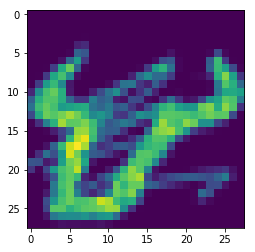

In [481]:
# For showing a single imgae file after reshaping.
some_digit = X_train[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image)
plt.show()

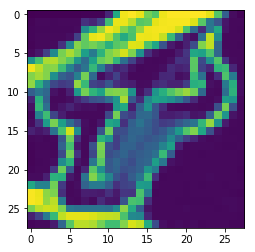

In [482]:
# For shuffling X_Train and Y_Train.
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
some_digit = X_train[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image)
plt.show()

In [483]:
# For importing creating Stochastic Gradient Descent.
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)
type(sgd)

sklearn.linear_model.stochastic_gradient.SGDClassifier

In [484]:
y_test[0:10]

array(['Non USF', 'Non USF', 'Non USF', 'Non USF', 'Non USF', 'Non USF',
       'Non USF', 'Non USF', 'Non USF', 'Non USF'], dtype='<U7')

In [485]:
# Trying to fit the data with the sgd model and predicting using X_test data..
sgd.fit(X_train, y_train)
prediction = sgd.predict(X_test)

C:\Users\asus\Anaconda3\Lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [486]:
# importing accuracy score
from sklearn.metrics import accuracy_score

In [487]:
# For getting the accuracy from the model.
total =0
total = accuracy_score(y_test, prediction)


In [488]:
print(total)

0.45


In [430]:
# For importing cross validation score
from sklearn.model_selection import cross_val_score

In [431]:
# For calculating cross val score by giving CV=3.
cross_val_score(sgd, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\asus\Anaconda3\Lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\asus\Anaconda3\Lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\asus\Anaconda3\Lib\site-p

array([0.82716049, 0.8       , 0.87341772])

In [432]:
# For importing cross validation prediction.
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd, X_train, y_train, cv=3)

C:\Users\asus\Anaconda3\Lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\asus\Anaconda3\Lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\asus\Anaconda3\Lib\site-p

In [310]:
len(y_train_pred)

240

In [311]:
# For importing  confusion matrix and creating confusion matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred) # actual vs predicted

array([[ 25,  15],
       [ 51, 149]], dtype=int64)